# Finding the Eigenstate Energies
Problem 2.56 in Griffith's Quantum Mechanics 3rd Edition asks us to use the 'wag the dog' method for finding $E_1, E_2$ and $E_3$ energy states for a quantum oscillator.

# Quantum Oscillator
## $\frac{\partial^2 \psi}{\partial \xi^2} = (\xi^2 - K)\psi$ Eq. (1)

## where $\xi = \sqrt{\frac{m\omega}{\hbar}}x$, $K=\frac{2E}{\hbar\omega}$

# Finding Even and Odd $E_n$
As hinted at in the problem description `For the first (and third) excited state you will need to set` $\psi(\xi)=0, \psi'(\xi)=1$. We need to flip our initial conditions to find the first and third energy states. That is for $n=1$ and $n=3$, odd $n$ correspond to the odd eigenstates of the wave function; even $n$ correspond to even eigenstates.

# Wag the Dog
The following code will numerically solve Eq. (1) using the wag the dog method. It's also listed in the common folder in this repository.

In [43]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def wag_the_dog(x_range=(0,5), k_values=np.linspace(0.9, 1.1, 10), initial_values=(1.,0.)):
    """
        This function numerically solves the wave equation for a harmonic oscillator, based on a 'guess' for k and goes from there. This is for the problem 2.55 in Griffth's quantum mechanics (3rd edition).
    """
    positions = np.linspace(x_range[0], x_range[1], 1000)
    plt.figure(figsize=(24,8))

    allowed_potentials = ['harmonic oscillator']
    for k_value in k_values:  
        # Differential equation
        psi_prime = lambda xi, psi, k: [psi[1], (xi**2-k)*psi[0]]

        # Solve differential equation using scipy
        sol = solve_ivp(psi_prime, x_range, initial_values, t_eval=positions, args=[k_value])

        # Plot solution
        plt.plot(positions, sol.y[0], label=fr'$k$: {k_value:.4f}')

    # Plotting configuration
    plt.legend()
    plt.axhline(c='black')
    plt.xlabel(r'$\xi$')
    plt.ylabel(r'$\psi_n(\xi)$')
    plt.ylim(-1,1)
    plt.show()

# Using the Above Code
Using the above code, we can specify different K values to find the eigenstates through trial and error. Let's start by finding the even eigenstates.

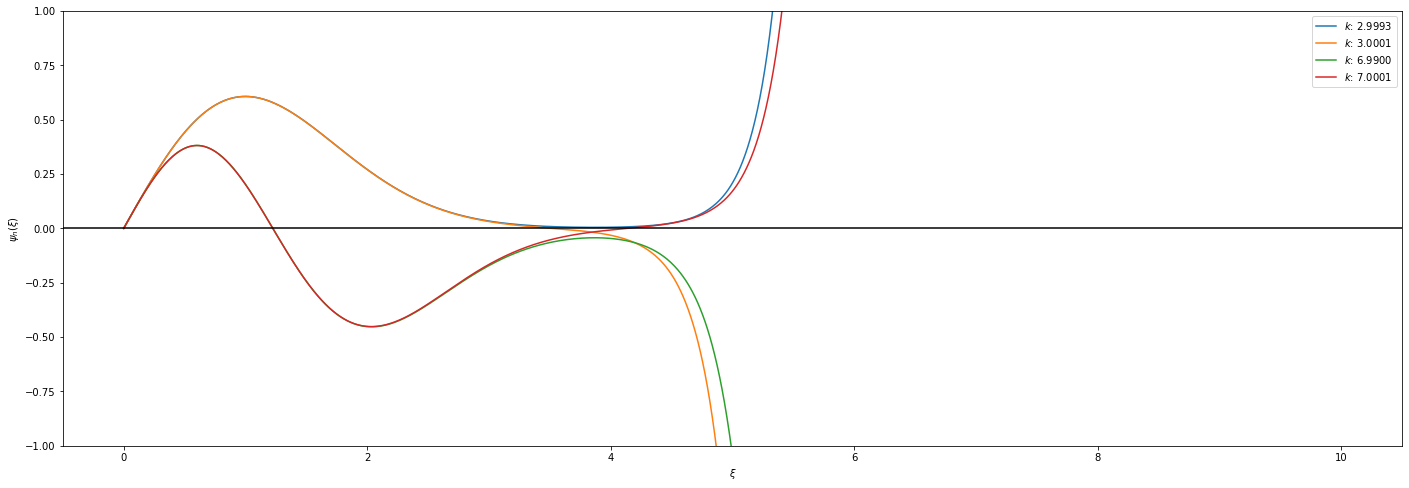

In [65]:
wag_the_dog(x_range=(0,10), k_values=(2.9993, 3.0001, 6.9900, 7.0001), initial_values=(0.,1.))

# Calculating the Odd Eigenstate Energies
As seen in the above code, it appears that around $K=3$ and $K=7$ the tail end of the wave function flips about the $\xi$ axis. This indicates that the two lowest odd energy states $E_1, E_3$ are here as the graph did not flip anywhere below these points. We calculate the energy values as follows:

## $K=\frac{2E_1}{\hbar\omega} \approx 3 \implies E_1 = \frac{3}{2}\hbar\omega$
## $K=\frac{2E_3}{\hbar\omega} \approx 7 \implies E_3 = \frac{7}{2}\hbar\omega$

# Calculating the Even Eigenstate Energies
Using the new boundary conditions as stated above, we can calculate the energies for the even states ($E_2$)

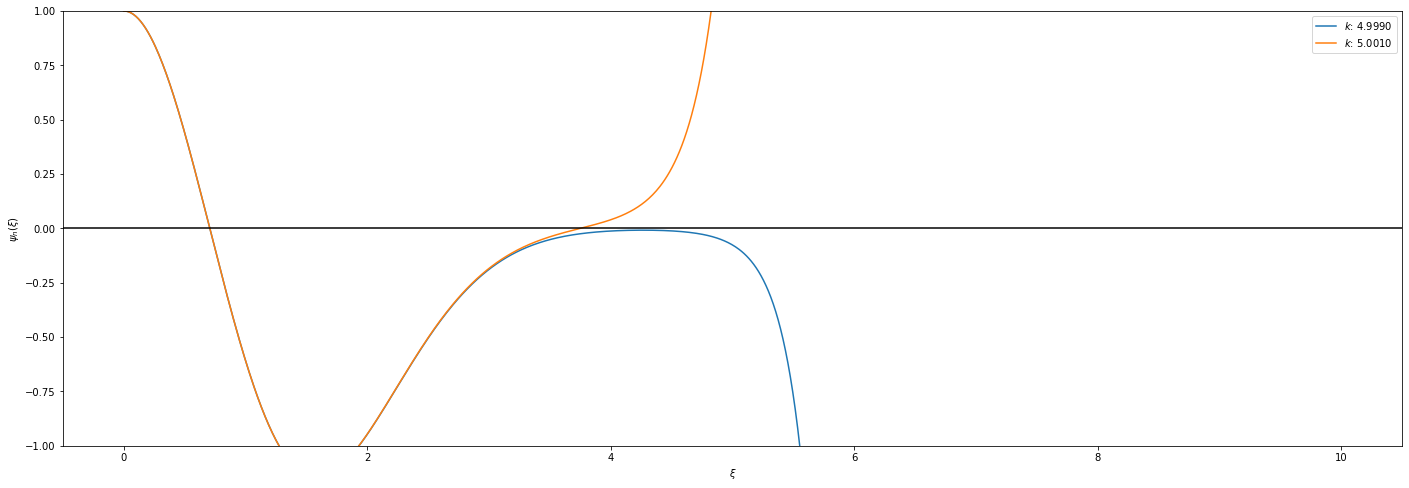

In [74]:
wag_the_dog(x_range=(0,10), k_values=(4.999,5.001), initial_values=(1.,0.))

As we did above for the odd states,

## $K=\frac{2E_2}{\hbar\omega} \approx 5 \implies E_2 = \frac{5}{2}\hbar\omega$